# Лабораторная работа №1 Белоцкий Дмитрий 

# Задание I. 

In [2]:
import numpy
import math
from matplotlib import pyplot as plt
from prettytable import PrettyTable

In [3]:
def func(x):
    return x-2*math.exp(-x)
def diff(x):
    return 1+2*math.exp(-x)

In [4]:
def bisection(f,a,b,n): # аргументы - функция, границы поиска, количество итераций
    mid = (a+b)/2
    if n == 0:
        return mid
    if f(mid)*f(a) < 0:
        return bisection(f,a,mid,n-1)
    if f(mid)*f(b) < 0:
        return bisection(f,mid,b,n-1)
    
    
def chord(f,a,b,n): # аргументы - функция, границы поиска, количество итераций
    next = a - (b-a)*f(a)/(f(b)-f(a))
    if n == 0:
        return next
    return chord(f,next,b,n-1)


def Newton(f,diff,a,n):
    next = a - f(a)/diff(a)
    if n == 0:
        return next
    return Newton(f,diff,next,n-1)

In [5]:
print(bisection(func,0,1,3))
print(chord(func,0,1,3))
print(Newton(func,diff,1,3))

0.8125
0.8526043633269464
0.8526055020137255


Алгоритм нахождения корня методом Стеффенсена, написанный в scilab

In [ ]:
function [ans] = f(x)
    ans=x-2*exp(-x)
endfunction

function [ans]=SteffensenRoot(func,Xest)
    count = 0;
    err = 1.0;
    while err > 1e-6 & count < 100
        ans = Xest - func(Xest)*func(Xest)/(func(Xest+func(Xest))-func(Xest))
        count = count + 1
        err = abs((ans-Xest)/ans)
        Xest = ans
    end
    if count >=100 then ans = -1
    end
endfunction

ans = SteffensenRoot(f,100)

ans = 0.8526055

Полученные ответы при использовании python и scilab совпадают с точностью до относительной ошибки

# Задание II.

In [6]:
Th = Tc = 298
Jc = 3000
Jh = 5000
for i in range(100):
    TcNext = ((Jc-17.41*Tc+5188.18)/5.67e-8)**(1/4)
    ThNext = ((2250+Jh-1.865*Th)/5.67e-8)**(1/4)
    JcNext = 2352.71 + 0.71*Jh - 7.46*Tc
    JhNext = 11093 + 0.71*Jc - 7.46*Th
    Jc, Jh, Tc, Th = JcNext, JhNext, TcNext, ThNext
print(Tc, Th, Jc, Jh, end =' ')

481.0272546990047 671.1239779386548 6222.2250824538205 10504.194933130066 

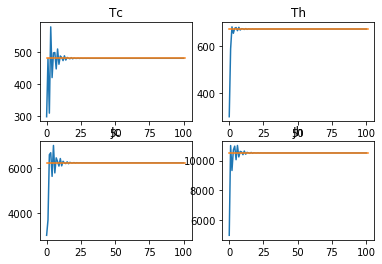

In [7]:
import matplotlib.pyplot as plt
import pylab
Th, Tc, Jc, Jh = [], [], [], []
Th.append(298)
Tc.append(298)
Jc.append(3000)
Jh.append(5000)
for i in range(100):
    Tc.append(((Jc[i]-17.41*Tc[i]+5188.18)/5.67e-8)**(1/4))
    Th.append(((2250+Jh[i]-1.865*Th[i])/5.67e-8)**(1/4))
    Jc.append(2352.71 + 0.71*Jh[i] - 7.46*Tc[i])
    Jh.append(11093 + 0.71*Jc[i] - 7.46*Th[i])
x = range(101)
pylab.subplot(2, 2, 1)
pylab.plot(x, Tc)
plt.plot([0, len(x)], [481]*2)
pylab.title("Tc")

pylab.subplot(2, 2, 2)
pylab.plot(x, Th)
plt.plot([0, len(x)], [671]*2)
pylab.title("Th")

pylab.subplot(2, 2, 3)
pylab.plot(x, Jc)
plt.plot([0, len(x)], [6222]*2)
pylab.title("Jc")

pylab.subplot(2, 2, 4)
pylab.plot(x, Jh)
plt.plot([0, len(x)], [10504]*2)
pylab.title("Jh")

pylab.show()

# Задание III.

Решим численным методом следующую задачу механики. Пусть катер находится на расстоянии s_0 от острова посреди реки, катер начинается двигаться с постоянным ускорением а_0 против течения реки, скорость течения реки v_0, найти время за которое катер достигнет острова.
s_0 = -10; a_0 = 2; v_0 = -3

In [13]:
def find_time(t):
    return -10 - 4*t + t**2

In [15]:
def bisection_and_chord(f, a, b, n):
    Ans = [b]
    mid = (a + b) / 2
    if f(mid) * f(a) < 0:
        b = mid
    if f(mid) * f(b) < 0:
        a = mid
    err = 1
    count = 1
    Ans.append(b)
    while err > 1e-15 and count < n:
        mid = ((a+b)/2)
        err_bis = abs((b - mid) / b)
        next_chord = a - (b - a) * f(a) / (f(b) - f(a))
        err_chord = abs((b - next_chord)/b)
        if err_bis < err_chord:
            if f(mid) * f(a) < 0:
                b = mid
            if f(mid) * f(b) < 0:
                a = mid
            err = err_bis
            Ans.append(b)
        else:
            b = next_chord
            err = err_chord
            Ans.append(b)
        count += 1
    if count == n:
        print("Не сошлось")
    return Ans


print(bisection_and_chord(find_time, 5, 6, 100))


[6, 6, 5.75, 5.741379310344827, 5.741666666666666, 5.741657077100116, 5.741657397107898, 5.741657386429092, 5.74165738678545, 5.741657386773557, 5.741657386773954, 5.741657386773942, 5.741657386773941]


In [ ]:
function [ans] = f(x)#код из скайлаба
    ans=-10 - 4*x + x**2
endfunction

function [b, Ans] = BiRegRoot(Fun,a,b,ErrMax)
    Ans = [b]
    mid = (a+b)/2
    if Fun(mid) * Fun(a) < 0 then
         b = mid
    end
    if Fun(mid) * Fun(b) < 0 then
         a = mid
    end
    Ans = [Ans, [b]]
    err = 1
    count = 1
    while err > 1e-9 & count < 100
        mid = (a+b)/2
        err_bis = abs((b - mid) / b)
        next_chord = a - (b - a) * Fun(a) / (Fun(b) - Fun(a))
        err_chord = abs((b - next_chord)/b)
        if err_bis < err_chord then
            if Fun(mid) * Fun(a) < 0 then
                b = mid
            end
            if Fun(mid) * Fun(b) < 0 then 
                a = mid
            end
            err = err_bis
            Ans = [Ans, [b]]
        else
            b = next_chord
            err = err_chord
            Ans = [Ans, [b]]
        end
        count = count + 1
    end
endfunction
[Xs, Ans] = BiRegRoot(f, 5, 8, 100)
X = [0:1:10]
plot2d(X,Ans,-8)
p = poly([-10 -4 1],"x","coeff")
roots(p)

ans  =
   5.7416574  
  -1.7416574  
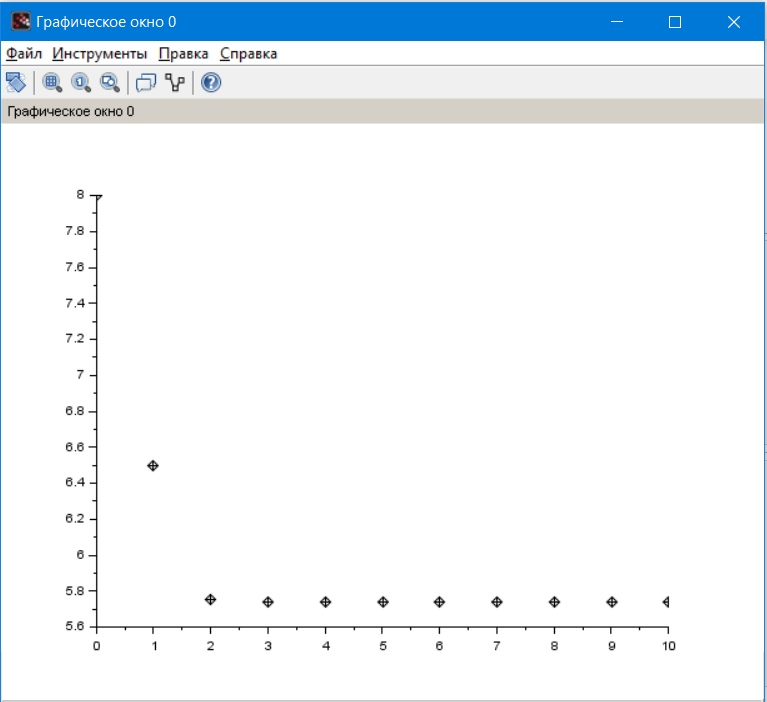

# Задание IV.

In [ ]:
def Func4(x):
    return 2*x**3-4*x**2-4*x-20
def Diff4(x):
    return 6*x**2-8*x-4
print(Newton(Func4,Diff4,4,10))

Для нахождения численного ответа был выбран метод Ньютона, т.к. заданная функция удовлетворяет условиям применения данного 
метода: функция дважды непрерывнодифференцируема, простое вычисление производной, начальное приближение [3,4] достаточно близко
к искомому корню. С другой стороны метод Ньютона имеет быструю сходимость (квадратичную).

In [ ]:
p = poly([-20 -4 -4 2],"x","coeff")# код из скайлаба
roots(p)

ans  =
   3.4318475  
  -0.7159238 + 1.5496243i
  -0.7159238 - 1.5496243i

# Задание V. (Вариант 3)

In [12]:
def MyNewton(f, diff, a, e):
    Ans = [a]
    err = 1
    while err > e:
        Ans.append(Ans[-1] - f(Ans[-1]) / diff(Ans[-1]))
        err = abs((Ans[-1]-Ans[-2])/Ans[-2])
    return Ans


def MyIteration(f,diff,a,e):
    Ans = [a]
    c = diff(a)
    err = 1
    while err > e:
        Ans.append(Ans[-1] - f(Ans[-1]) / c)
        err = abs((Ans[-1]-Ans[-2])/Ans[-2])
    return Ans


def MyFunction(x):
    return math.exp(x)-4*math.exp(-x)-1


def MyDerivative(x):
    return math.exp(x)+4*math.exp(-x)

In [15]:
x_by_Newton = MyNewton(MyFunction, MyDerivative, 1 , 1e-16)
x_by_Iteration = MyIteration(MyFunction, MyDerivative, 1 , 1e-16)
table = PrettyTable()

table.add_column("n", range(max(len(x_by_Newton),len(x_by_Iteration))))
table.add_column("Newton", x_by_Newton+['']*6)
table.add_column("Iteration", x_by_Iteration)

print(table)
with open("task5.txt", "w") as file:
    file.write(table.get_string())

+----+--------------------+--------------------+
| n  |       Newton       |     Iteration      |
+----+--------------------+--------------------+
| 0  |         1          |         1          |
| 1  | 0.9411036116913511 | 0.9411036116913511 |
| 2  | 0.9406136712557394 | 0.9406214128606493 |
| 3  | 0.9406136421072088 | 0.9406137657962239 |
| 4  | 0.9406136421072088 | 0.9406136440761105 |
| 5  |                    | 0.9406136421385501 |
| 6  |                    | 0.9406136421077077 |
| 7  |                    | 0.9406136421072167 |
| 8  |                    | 0.9406136421072089 |
| 9  |                    | 0.9406136421072088 |
| 10 |                    | 0.9406136421072088 |
+----+--------------------+--------------------+


# Задание VI (Вариант 3)

In [16]:
def F(x,y):
    return math.tan(x*y+0.1)-x**2

def G(x,y):
    return x**2+y**2 - 1

def F_x(x,y):
    return y/(math.cos(x*y+0.1)**2)-2*x

def F_y(x,y):
    return x/(math.cos(x*y+0.1)**2)

def G_x(x,y):
    return 2*x

def G_y(x,y):
    return 2*y

def J(x,y):
    return F_x(x,y) * G_y(x,y) - F_y(x,y) * G_x(x,y)

def Dx(x,y):
    return F(x, y) * G_y(x, y) - F_y(x, y) * G(x, y)

def Dy(x,y):
    return F_x(x,y) * G(x,y) - F(x,y) * G_x(x,y)

def MyNewton(x0,y0):
    AnsX = [x0]
    AnsY = [y0]
    err = 1
    count = 0;
    while err > 1e-16 and count < 100:
        AnsX.append(AnsX[-1] - Dx(AnsX[-1], AnsY[-1])/J(AnsX[-1], AnsY[-1]))
        AnsY.append(AnsY[-1] - Dy(AnsX[-1], AnsY[-1]) / J(AnsX[-1], AnsY[-1]))
        errX = abs((AnsX[-1]-AnsX[-2])/AnsX[-2])
        errY = abs((AnsY[-1] - AnsY[-2]) / AnsY[-2])
        err = math.sqrt(errX**2+errY**2)
        count += 1
    return (AnsX,AnsY)

(X, Y) = MyNewton(1, 1)
table = PrettyTable()

table.add_column("n", range(len(X)))
table.add_column("X_n", X)
table.add_column("Y_n", Y)

print(table)
with open("Task6.txt", "w") as file:
    file.write(table.get_string())

+---+----------------------+--------------------+
| n |         X_n          |        Y_n         |
+---+----------------------+--------------------+
| 0 |          1           |         1          |
| 1 | 0.26730970093636586  | 1.1163660534930284 |
| 2 | -0.16537209885934667 | 1.0033178911016325 |
| 3 | -0.09630533245169558 | 0.9957988463430361 |
| 4 | -0.09195257230626366 | 0.9957648138127313 |
| 5 | -0.09193713556038201 | 0.9957648131664039 |
| 6 | -0.09193713536801416 | 0.995764813166404  |
| 7 | -0.09193713536801416 | 0.995764813166404  |
+---+----------------------+--------------------+
